## Source Code for SCALE-CPET
---
The following notebook will contain all of the algorithms and documentation of said algorithms that leads to the enhanced interpretation of the cardiopulmonary exercise test with the input parameters that are specified. This will be the basis of the entire rewrite in the python language. All of the legacy code in R is to be treated with caution.

---

In [46]:
# Initial Imports 

import pandas as pd
import numpy as np
import nbformat
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [6]:
# Initial Input Parameters

system_used = 'cosmed' # System Choices are: cosmed, vyaire, pnoe
data_source = 'src.xlsx'

In [27]:
# Initial Read of CSV

meta_data = pd.read_excel(data_source, header=None)
series_data = pd.read_excel(data_source)
series_data

,ID1,Unnamed: 1,Unnamed: 2,Test date,5/25/2022,Unnamed: 5,Barometric Pressure (mmHg),747,Unnamed: 8,t,...,Cadence,Satellites,Fixing,Satellites SNR,RealPower,VT/Ti,HRR,PaCO2_e,SV,CO
0,Last Name,Patel,NaN,Test Time,6:16 PM,NaN,Ambient Temperature (°C),26,NaN,s,...,1/min,---,---,dB,Watt,---,bpm,mmHg,mL,L/min
1,First Name,Shah,NaN,Test Duration,00:17:44,NaN,Ambient Relative Humidity (%),50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gender,Male,NaN,Exercise Duration,00:09:43,NaN,Flowmeter temperature (°C),34,NaN,00:00:04,...,0,0,False,25,0,0.53,201,38,0,0
3,Age,19,NaN,Subject Type,Healthy,NaN,Flowmeter Relative Humidity (%),100,NaN,00:00:07,...,0,0,False,27,0,0.5,201,38,0,0
4,Height (cm),182,NaN,Test Type,Maximal,NaN,STPD (---),0.8111,NaN,00:00:10,...,0,0,False,30,0,0.53,201,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:17:37,...,0,0,False,25,0,1.41,68,31,62.1,8.3
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:17:39,...,0,0,False,26,0,1.36,70,31,63,8.3
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:17:40,...,0,0,False,27,0,1.39,71,31,64.6,8.4
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:17:42,...,0,0,False,27,0,1.4,72,31,65,8.4


In [73]:
# Formatting DataFrame

series_data = pd.read_excel(data_source, usecols='J:AJ')
series_data = series_data.drop([0, 1])
series_data = series_data[['t', "Power", 'VO2', 'VCO2', 'VE', "HR", "VO2/Kg", "RQ"]]
series_data

,t,Power,VO2,VCO2,VE,HR,VO2/Kg,RQ
2,00:00:04,0,326.155622,245.067737,9.959,0,4.64,0.75
3,00:00:07,0,387.101107,285.913276,10.988,0,5.51,0.74
4,00:00:10,0,445.754817,327.91102,11.909,0,6.34,0.74
5,00:00:13,0,462.734508,337.7789,12.18,0,6.58,0.73
6,00:00:16,0,474.95133,349.226754,12.289,0,6.76,0.74
...,...,...,...,...,...,...,...,...
518,00:17:37,0,787.11273,1021.005294,37.794,133,11.2,1.3
519,00:17:39,0,786.112493,1010.043826,38.304,131,11.18,1.28
520,00:17:40,0,809.55728,1045.310127,39.476,130,11.52,1.29
521,00:17:42,0,807.620959,1046.251436,39.289,129,11.49,1.3


In [74]:
# Converting Time to Seconds

series_data['t'] = series_data['t'].apply(lambda x: (int(x.strftime('%M'))*60 + int(x.strftime('%S'))))
series_data

,t,Power,VO2,VCO2,VE,HR,VO2/Kg,RQ
2,4,0,326.155622,245.067737,9.959,0,4.64,0.75
3,7,0,387.101107,285.913276,10.988,0,5.51,0.74
4,10,0,445.754817,327.91102,11.909,0,6.34,0.74
5,13,0,462.734508,337.7789,12.18,0,6.58,0.73
6,16,0,474.95133,349.226754,12.289,0,6.76,0.74
...,...,...,...,...,...,...,...,...
518,1057,0,787.11273,1021.005294,37.794,133,11.2,1.3
519,1059,0,786.112493,1010.043826,38.304,131,11.18,1.28
520,1060,0,809.55728,1045.310127,39.476,130,11.52,1.29
521,1062,0,807.620959,1046.251436,39.289,129,11.49,1.3


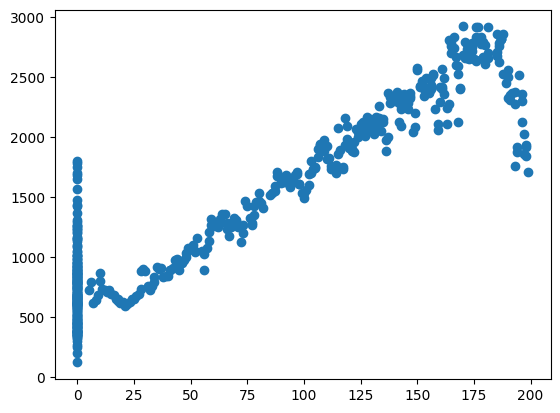

In [72]:
x = series_data['Power']
y = series_data['VO2']

fig, ax = plt.subplots()
ax.scatter(x, y)
